### MID 17
### Taking ant1.3 as training data.
### ant1.4 as testing data.
### Min max scaling done to few columns: ['wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom', 'ca', 'ce', 'npm', 'lcom3', 'loc', 'dam', 'moa', 'mfa', 'cam', 'ic', 'cbm', 'amc', 'max_cc', 'avg_cc']
### Oversampling and smote methods used to increase size of training data.
### Selection those features whose info gain > 0.2
### CNN model used, model type is 2 as per the BTP documentation spreadsheet.
### np.rint() used on predictions

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import time 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential, load_model
from keras.layers import Dense,Dropout,Conv2D,Conv1D,Flatten,MaxPool2D
import tensorflow as tf
import csv
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading data. 
train_data_path = "/home/bavanya/Desktop/6thSem/BTP/regression_PROMISE_dataset/datasets/ant-1.3.csv"
test_data_path = "/home/bavanya/Desktop/6thSem/BTP/regression_PROMISE_dataset/datasets/ant-1.4.csv"
train_data_name = "ant-1.3"
test_data_name = "ant-1.4"
ant_1_3 = pd.read_csv(train_data_path)
ant_1_4 = pd.read_csv(test_data_path)
files = ["/home/bavanya/Desktop/6thSem/BTP/regression_PROMISE_dataset/datasets/ant-1.3.csv", "/home/bavanya/Desktop/6thSem/BTP/regression_PROMISE_dataset/datasets/ant-1.4.csv"]
combined_data = pd.concat(map(pd.read_csv, files))

In [3]:
# Applying Min Max Scaling.
scaler = MinMaxScaler()
MinMaxScaler(copy=True, feature_range=(0, 1))
cols_to_norm = ['wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom', 'ca', 'ce', 'npm', 'lcom3', 'loc', 'dam', 'moa', 'mfa', 'cam', 'ic', 'cbm', 'amc', 'max_cc', 'avg_cc']
combined_data[cols_to_norm] = MinMaxScaler().fit_transform(combined_data[cols_to_norm])

In [4]:
X = combined_data[cols_to_norm]
y = pd.DataFrame(combined_data['bug'])

/home/bavanya/Downloads/deb_packages/home/bavanya/Desktop/venv_python/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


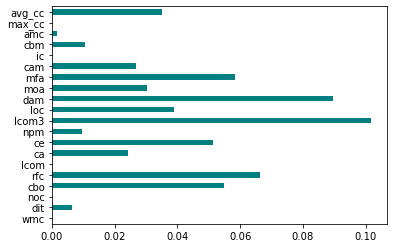

In [5]:
importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feat_importances.plot(kind='barh', color='teal')
plt.show()

In [ ]:
ant_1_3_scaled = combined_data[combined_data['version'] == 1.3] 
ant_1_4_scaled = combined_data[combined_data['version'] == 1.4] 

In [4]:
# Getting training and test data.
X_train = ant_1_3_scaled[cols_to_norm]
X_train = np.array(X_train)
Y_train = ant_1_3['bug']

X_test = ant_1_4_scaled[cols_to_norm]
X_test = np.array(X_test)
Y_test = ant_1_4['bug']

In [5]:
len(cols_to_norm)

20

In [6]:
# Applying over sampling and SMOTE to training data for augmentation.
ros = RandomOverSampler(random_state=0)
X_train, Y_train = ros.fit_resample(X_train, Y_train)

smt = SMOTE()
X_train, Y_train = smt.fit_resample(X_train, Y_train)


In [7]:
#Creating X_train dataframe after SMOTE
X_train = pd.DataFrame(X_train, columns=cols_to_norm)
X_train

wmc  dit    noc       cbo       rfc      lcom        ca        ce  \
0    0.142857  0.6  0.050  0.102941  0.214286  0.011856  0.014815  0.428571   
1    0.181818  0.0  0.025  0.058824  0.163265  0.020033  0.029630  0.142857   
2    0.038961  0.2  0.000  0.007353  0.045918  0.000000  0.000000  0.035714   
3    0.155844  0.4  0.000  0.088235  0.188776  0.013083  0.000000  0.428571   
4    0.077922  0.4  0.000  0.029412  0.107143  0.000409  0.000000  0.142857   
..        ...  ...    ...       ...       ...       ...       ...       ...   
415  0.285714  0.6  0.025  0.110294  0.530612  0.075634  0.014815  0.464286   
416  0.103896  0.6  0.000  0.051471  0.173469  0.002453  0.000000  0.250000   
417  0.220779  0.0  0.000  0.139706  0.372449  0.045789  0.096296  0.250000   
418  0.220779  0.0  0.000  0.139706  0.372449  0.045789  0.096296  0.250000   
419  0.077922  0.4  0.000  0.073529  0.168367  0.000000  0.022222  0.285714   

          npm     lcom3       loc  dam       moa       mfa       cam    ic  \
0    0.073529  0.362500  0.180119  1.0  0.111111  0.885057  0.232323  0.75   
1    0.176471  0.417582  0.117191  1.0  0.000000  0.000000  0.307692  0.00   
2    0.014706  0.000000  0.026448  1.0  0.111111  0.714286  0.666667  0.25   
3    0.176471  0.429293  0.141359  1.0  0.111111  0.770833  0.458333  0.00   
4    0.088235  0.350000  0.062016  1.0  0.000000  0.880952  0.416667  0.50   
..        ...       ...       ...  ...       ...       ...       ...   ...   
415  0.117647  0.419643  0.538076  1.0  0.000000  0.795918  0.180272  0.75   
416  0.117647  0.380952  0.285454  1.0  0.000000  0.917647  0.437500  0.50   
417  0.073529  0.421875  0.228910  1.0  0.111111  0.000000  0.170455  0.00   
418  0.073529  0.421875  0.228910  1.0  0.111111  0.000000  0.170455  0.00   
419  0.073529  0.233333  0.090287  1.0  0.111111  0.880952  0.333333  0.50   

          cbm       amc    max_cc    avg_cc  
0    0.363636  0.165951  0.085714  0.209085  
1    0.000000  0.080979  0.171429  0.269903  
2    0.090909  0.083267  0.028571  0.109529  
3    0.000000  0.115693  0.085714  0.232742  
4    0.181818  0.100881  0.028571  0.136898  
..        ...       ...       ...       ...  
415  0.272727  0.251110  0.085714  0.171759  
416  0.181818  0.367494  0.085714  0.266962  
417  0.000000  0.135355  0.057143  0.164285  
418  0.000000  0.135355  0.057143  0.164285  
419  0.363636  0.151321  0.057143  0.164285  

[420 rows x 20 columns]

In [8]:
#Creating Y_train dataframe after SMOTE
Y_train = pd.DataFrame(Y_train, columns=['bug'])
Y_train

bug
0      0
1      2
2      0
3      0
4      0
..   ...
415    3
416    3
417    3
418    3
419    3

[420 rows x 1 columns]

In [10]:
#Creating X_test dataframe after SMOTE
X_test = pd.DataFrame(X_test, columns=cols_to_norm)
X_test 

wmc  dit    noc       cbo       rfc      lcom        ca        ce  \
0    0.181818  0.4  0.000  0.058824  0.209184  0.013491  0.007407  0.285714   
1    0.064935  0.4  0.000  0.066176  0.219388  0.000000  0.000000  0.321429   
2    0.168831  0.0  0.025  0.058824  0.102041  0.018806  0.044444  0.071429   
3    0.103896  0.6  0.000  0.051471  0.178571  0.001635  0.000000  0.250000   
4    0.402597  0.0  0.000  0.044118  0.331633  0.099346  0.029630  0.071429   
..        ...  ...    ...       ...       ...       ...       ...       ...   
173  0.064935  0.4  0.000  0.051471  0.096939  0.001635  0.029630  0.142857   
174  0.220779  0.0  0.075  0.110294  0.336735  0.036795  0.029630  0.428571   
175  0.298701  0.0  0.000  0.227941  0.418367  0.082175  0.162963  0.964286   
176  0.142857  0.0  0.200  0.161765  0.438776  0.006132  0.059259  0.500000   
177  0.051948  0.2  0.000  0.022059  0.081633  0.000000  0.000000  0.107143   

          npm     lcom3       loc       dam       moa       mfa       cam  \
0    0.147059  0.380342  0.175559  1.000000  0.222222  0.740000  0.357143   
1    0.073529  0.333333  0.125855  1.000000  0.000000  0.902439  0.533333   
2    0.117647  0.333333  0.050616  1.000000  0.000000  0.000000  0.615385   
3    0.102941  0.357143  0.120839  1.000000  0.000000  0.917647  0.468750   
4    0.441176  0.363333  0.340629  1.000000  0.000000  0.000000  0.182796   
..        ...       ...       ...       ...       ...       ...       ...   
173  0.058824  0.375000  0.068855  0.000000  0.000000  0.902439  0.400000   
174  0.088235  0.395833  0.287278  1.000000  0.222222  0.000000  0.197917   
175  0.250000  0.446970  0.498404  0.444444  0.000000  0.000000  0.318182   
176  0.058824  0.364286  0.404469  1.000000  0.777778  0.000000  0.266667   
177  0.058824  0.166667  0.026904  1.000000  0.000000  0.842105  0.875000   

       ic       cbm       amc    max_cc    avg_cc  
0    0.25  0.090909  0.124214  0.114286  0.258157  
1    0.50  0.272727  0.257486  0.028571  0.131428  
2    0.00  0.000000  0.034735  0.028571  0.126368  
3    0.75  0.272727  0.150721  0.142857  0.225891  
4    0.25  0.090909  0.108629  0.114286  0.190784  
..    ...       ...       ...       ...       ...  
173  0.25  0.090909  0.138351  0.028571  0.131428  
174  0.00  0.000000  0.172373  0.400000  0.396221  
175  0.00  0.000000  0.219724  0.685714  0.378561  
176  0.00  0.000000  0.373390  0.628571  0.761689  
177  0.25  0.090909  0.064852  0.142857  0.287498  

[178 rows x 20 columns]

In [11]:
#Creating Y_test dataframe after SMOTE
Y_test = pd.DataFrame(Y_test, columns=['bug'])
Y_test

bug
0      0
1      0
2      0
3      0
4      0
..   ...
173    0
174    0
175    0
176    1
177    0

[178 rows x 1 columns]

In [12]:
#Getting the rows and columns size in our data
img_rows, img_cols = 1,len(cols_to_norm)

In [16]:
# Preparing the data for the model.
X_train_matrix = X_train.values
X_test_matrix = X_test.values
Y_train_matrix = Y_train.values
Y_test_matrix = Y_test.values

In [18]:
# Preparing the data for the model.
Ytrainseries = Y_train['bug']
Ytestseries = Y_test['bug']

In [20]:
# Preparing the data for the model.
X_train1 = X_train_matrix.reshape(X_train_matrix.shape[0], img_rows, img_cols, 1)
X_test1 = X_test_matrix.reshape(X_test_matrix.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [27]:
#Building the model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=1, activation='relu',input_shape=input_shape))
model.add(Conv2D(32, kernel_size=1, activation='relu'))
model.add(Conv2D(16, kernel_size=1, activation='relu'))
    
    
#model.add(MaxPool2D(pool_size=(1,8)))
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='relu'))

#compile model using mse as the loss function
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanSquaredLogarithmicError()])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 1, 20, 64)         128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 20, 32)         2080      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 20, 16)         528       
_________________________________________________________________
flatten_1 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 2568      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 5,313
Trainable params: 5,313
Non-trainable params: 0
____________________________________________________

In [29]:
# Fitting the model on training data.
history = model.fit(X_train1, Y_train_matrix, epochs = 100, batch_size = 128)

Epoch 1/100
4/4 [==============================] - 0s 5ms/step - loss: 3.3477 - mse: 3.3477 - mae: 1.4705 - root_mean_squared_error: 1.8297 - mean_squared_logarithmic_error: 0.8250
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 3.0264 - mse: 3.0264 - mae: 1.4124 - root_mean_squared_error: 1.7397 - mean_squared_logarithmic_error: 0.6814
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 2.6661 - mse: 2.6661 - mae: 1.3392 - root_mean_squared_error: 1.6328 - mean_squared_logarithmic_error: 0.5470
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 2.2652 - mse: 2.2652 - mae: 1.2441 - root_mean_squared_error: 1.5050 - mean_squared_logarithmic_error: 0.4256
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 1.8300 - mse: 1.8300 - mae: 1.1233 - root_mean_squared_error: 1.3528 - mean_squared_logarithmic_error: 0.3282
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 1.4084 - mse: 1.4084 - m

4/4 [==============================] - 0s 6ms/step - loss: 0.9163 - mse: 0.9163 - mae: 0.8489 - root_mean_squared_error: 0.9572 - mean_squared_logarithmic_error: 0.2088
Epoch 47/100
4/4 [==============================] - 0s 6ms/step - loss: 0.9057 - mse: 0.9057 - mae: 0.8406 - root_mean_squared_error: 0.9517 - mean_squared_logarithmic_error: 0.2048
Epoch 48/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8996 - mse: 0.8996 - mae: 0.8326 - root_mean_squared_error: 0.9485 - mean_squared_logarithmic_error: 0.2081
Epoch 49/100
4/4 [==============================] - 0s 6ms/step - loss: 0.8872 - mse: 0.8872 - mae: 0.8219 - root_mean_squared_error: 0.9419 - mean_squared_logarithmic_error: 0.2077
Epoch 50/100
4/4 [==============================] - 0s 6ms/step - loss: 0.8731 - mse: 0.8731 - mae: 0.8136 - root_mean_squared_error: 0.9344 - mean_squared_logarithmic_error: 0.2030
Epoch 51/100
4/4 [==============================] - 0s 6ms/step - loss: 0.8647 - mse: 0.8647 - mae: 0.8

In [30]:
# Getting the predictions.
predictions_y = model.predict(X_test1)
predictions_y

array([[0.95741487],
       [1.8154376 ],
       [0.62886   ],
       [1.4323324 ],
       [1.3270772 ],
       [0.9934691 ],
       [1.6132008 ],
       [0.        ],
       [0.82455075],
       [2.2223775 ],
       [1.3640704 ],
       [2.3311577 ],
       [0.7706549 ],
       [1.3643173 ],
       [1.4656059 ],
       [0.        ],
       [2.2422698 ],
       [0.30854362],
       [0.        ],
       [0.7750977 ],
       [0.7510083 ],
       [0.3601112 ],
       [0.3732196 ],
       [1.6824895 ],
       [2.3395653 ],
       [1.5563829 ],
       [0.80490327],
       [0.6004784 ],
       [0.9173728 ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.0680909 ],
       [0.5708803 ],
       [0.        ],
       [1.2409664 ],
       [0.        ],
       [0.8786179 ],
       [0.        ],
       [1.3930678 ],
       [0.        ],
       [0.        ],
       [1.9242854 ],
       [0.        ],
       [0.        ],
       [0.9272046 ],
       [1.850

In [31]:
# Rounding off the predictions to nearest
#integer as count of bugs is an integer.
predictions_y_round = np.rint(predictions_y)
predictions_y_round 

array([[1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [2.],
       [2.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [1.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],

In [32]:
# Viewing the number of predictions.
predictions_y_round.shape

(178, 1)

In [37]:
# Getting the sum of all the predictions obtained to used while obtaining FPA
s = 0
for  t in range(predictions_y_round.shape[0]):
    s+=predictions_y_round[t]
s

array([139.], dtype=float32)

In [38]:
# Obtaining the value of FPA metric for the model
Fpa = 0
for  t in range(predictions_y_round.shape[0]):
        x = 0
        for j in range( predictions_y_round.shape[0]-t+1, predictions_y_round.shape[0]):
               x = x + predictions_y_round[j]
        
        x = (x/s)/predictions_y_round.shape[0]
        Fpa = Fpa + x
Fpa

array([0.4846415], dtype=float32)

In [39]:
# Obtaining the value of CLC metric for the model
previous_obtained = predictions_y_round[predictions_y_round.shape[0] - 1]/s

CLC = 0
for i in range(predictions_y_round.shape[0]):
    if(i==0):
        CLC += 0 + previous_obtained
    else:
        additional = (predictions_y_round[predictions_y_round.shape[0] - 1 - i])/s
        CLC += 2*previous_obtained + additional
        previous_obtained += additional
        
CLC/=(2*predictions_y_round.shape[0])
CLC

array([0.4930281], dtype=float32)

In [41]:
# Getting direct metric results using the metrics given to model.
score = model.evaluate(X_test1, Y_test_matrix)
print(history.history.keys())
model.test_on_batch(X_test1, Y_test_matrix)
model.metrics_names
#print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
#print("\n%s: %.2f%%" % (model.metrics_names[2], score[2]*100))
#print("\n%s: %.2f%%" % (model.metrics_names[3], score[3]*100))


6/6 [==============================] - 0s 1ms/step - loss: 1.1203 - mse: 1.1203 - mae: 0.7957 - root_mean_squared_error: 1.0584 - mean_squared_logarithmic_error: 0.3892
dict_keys(['loss', 'mse', 'mae', 'root_mean_squared_error', 'mean_squared_logarithmic_error'])


['loss',
 'mse',
 'mae',
 'root_mean_squared_error',
 'mean_squared_logarithmic_error']

In [42]:
# Saving the model
model_id = 3
path_to_save = '/home/bavanya/Desktop/6thSem/BTP/regression_PROMISE_dataset/saved_models/ant1.3_ant1.4_model2/ant1.3_ant1.4_model2_1'
model.save(path_to_save)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /home/bavanya/Desktop/6thSem/BTP/regression_PROMISE_dataset/saved_models/ant1.3_ant1.4_model2/ant1.3_ant1.4_model2_1/assets


In [43]:
# Writing the results to csv file.
heading = ['model_id', 'train_data_name', 'test_data_name'] + model.metrics_names + ['fpa', 'clc']
score = [model_id, train_data_name, test_data_name] + score + [float(Fpa) , float(CLC)]

In [44]:
heading

['model_id',
 'train_data_name',
 'test_data_name',
 'loss',
 'mse',
 'mae',
 'root_mean_squared_error',
 'mean_squared_logarithmic_error',
 'fpa',
 'clc']

In [45]:
score

[3,
 'ant-1.3',
 'ant-1.4',
 1.120253562927246,
 1.120253562927246,
 0.7956892848014832,
 1.0584203004837036,
 0.38921767473220825,
 0.48464149236679077,
 0.49302810430526733]

In [46]:
# Writing the results to csv file.
with open(path_to_save + '_metric_results.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(heading)
    writer.writerow(score)


In [47]:
# Loading the model and to make sure that the model is saved properly.
model_loaded = load_model(path_to_save)